In [230]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
diabetes_df = pd.read_csv('diabetes.csv')

%pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [231]:
from sklearn.model_selection import train_test_split

X=diabetes_df.drop('Outcome', axis=1)
y=diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=32)

In [232]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [233]:
#overfitting
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)



In [234]:
#desicion tree classifier
#deep and complex trees tend to overfit, so we want to generalize and have 
#reasonably simple trees as much as possible
model = tree.DecisionTreeClassifier(max_depth = 3, random_state=32)


In [235]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       147
           1       0.70      0.64      0.67        84

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



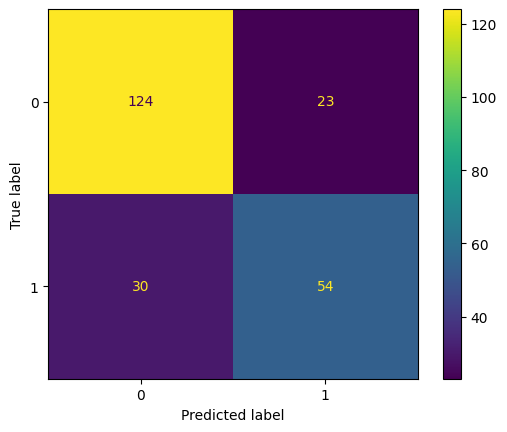

In [237]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [238]:
#Precision
54/77

0.7012987012987013

In [239]:
#Recall
54/84

0.6428571428571429

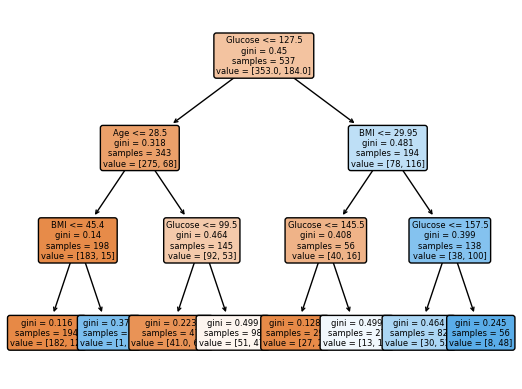

<Figure size 640x480 with 0 Axes>

In [240]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names = list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand

In [241]:
def format_names(names):
  if len(names) == 1:
    return names[0] 
  elif len(names) == 2:
    return " & ".join(names)
  last_two = names[-2:]
  rest = names[:-2]
  return ", ".join(rest) + ", " + " & ".join(last_two)
names = ["Virginia", "Anish", "Aarushi", "Martin"]
formattednames = format_names(names)
print(formattednames)


Virginia, Anish, Aarushi & Martin
